## Lab 6: Machine Learning with sklearn
### Regression Problems

The students performance in exams dataset on Kaggle consists of marks secured by 1,000 students in the math, reading and writing subjects. Along with these test scores, the description of each student such as their gender, race/ethnicity, parental level of education, lunch and test preparation course are also included in the dataset.

The goal of this project is to build a machine learning model that can predict students' test score given their description. This is a regression problem in machine learning.

In [ ]:
# Loading the dataset
import pandas as pd
students = pd.read_csv('StudentsPerformance.csv')
students.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master degree,standard,none,90,95,93
3,male,group A,associate degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


##### Task1: Explore the data and check of there are any missing values

In [ ]:
# Write your answer here
students.isnull().sum()

,0
gender,0
race/ethnicity,0
parental level of education,0
lunch,0
test preparation course,0
math score,0
reading score,0
writing score,0


#### Task2: Identifying the target coulmn

Since the 3 test scores are highly positively correlated with each other (check the correlation graph below), it is appropriate for us to take the average. So, make a new column (mean_score) that have the average of all the three scores. Also, remove the three scores from the dataset

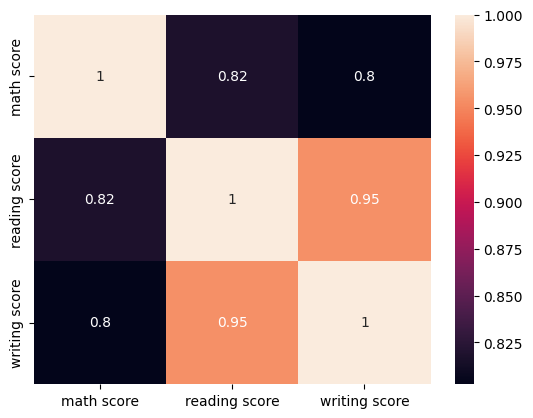

In [ ]:
import seaborn as sns
score = students[['math score', 'reading score', 'writing score']]
correlation = score.corr()
sns.heatmap(correlation, annot = True)

# Write your answer here
# Calculate average of all test results
students['mean score'] = (students['math score']+students['reading score']+students['writing score'])/3

# Drop math score, reading score and writing score

students = students.drop(['math score','reading score','writing score'], axis=1)

In [ ]:
students.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,mean score
0,female,group B,bachelor degree,standard,none,72.666667
1,female,group C,some college,standard,completed,82.333333
2,female,group B,master degree,standard,none,92.666667
3,male,group A,associate degree,free/reduced,none,49.333333
4,male,group C,some college,standard,none,76.333333


#### Task 4: Graphs to explore the dataset variables

Exploratory data analysis is the process of analysing and visualising the variables in a dataset. This step is not necessary for machine learning but data scientests like to examine the data first before performing any machine learning.

The predictor variables in the dataset are:

* Gender
* Race/ethnicity
* Parental level of education
* Lunch
* Test preparation course

In this task, we will explore how these different features influence the outcome of a student's test score. I will check the first one and do the rest

In [ ]:
# relation of all this columns with the target column
# Mean score by gender
                                                     # dont make gender by index
students[['gender', 'mean score']].groupby('gender', as_index = False).mean()

,gender,mean score
0,female,69.569498
1,male,65.837483


<Axes: xlabel='gender', ylabel='mean score'>

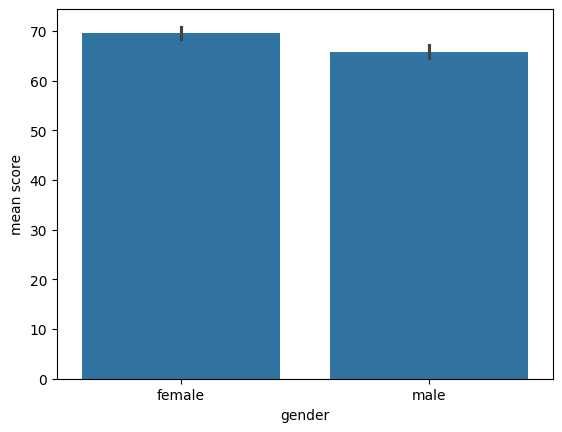

In [ ]:
# Mean score by gender

sns.barplot(x = 'gender', y = 'mean score', data = students)

In [ ]:
# Write your answer here
students[['race/ethnicity', 'mean score']].groupby('race/ethnicity', as_index = False).mean()

,race/ethnicity,mean score
0,group A,62.992509
1,group B,65.468421
2,group C,67.131661
3,group D,69.179389
4,group E,72.752381


<Axes: xlabel='race/ethnicity', ylabel='mean score'>

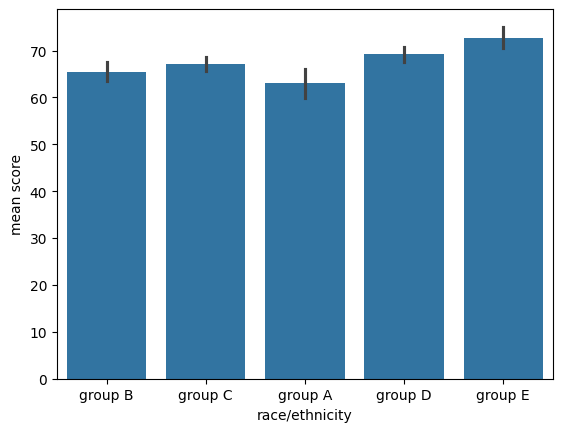

In [ ]:
sns.barplot(x = 'race/ethnicity', y = 'mean score', data = students)

In [ ]:
students[['parental level of education', 'mean score']].groupby('parental level of education', as_index = False).mean()

,parental level of education,mean score
0,associate degree,69.569069
1,bachelor degree,71.923729
2,high school,63.096939
3,master degree,73.598870
4,some college,68.476401
5,some high school,65.108007


<Axes: xlabel='parental level of education', ylabel='mean score'>

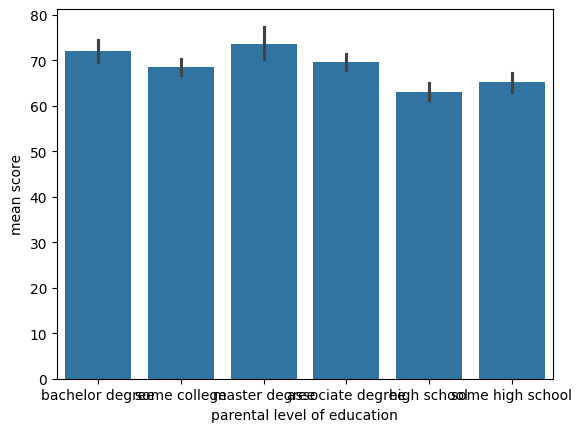

In [ ]:
# parental level of education
# Write your answer here
sns.barplot(x = 'parental level of education', y = 'mean score', data = students)

In [ ]:
students[['lunch', 'mean score']].groupby('lunch', as_index = False).mean()

,lunch,mean score
0,free/reduced,62.199061
1,standard,70.837209


<Axes: xlabel='lunch', ylabel='mean score'>

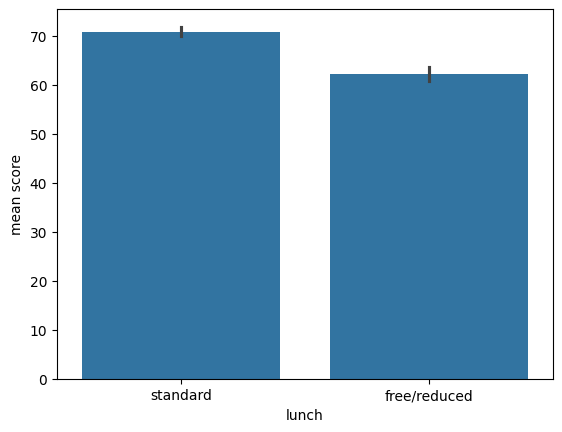

In [ ]:
# Lunch

sns.barplot(x = 'lunch', y = 'mean score', data = students)

In [ ]:
# Test preparation course
students[['test preparation course', 'mean score']].groupby('test preparation course', as_index = False).mean()

,test preparation course,mean score
0,completed,72.669460
1,none,65.038941


<Axes: xlabel='test preparation course', ylabel='mean score'>

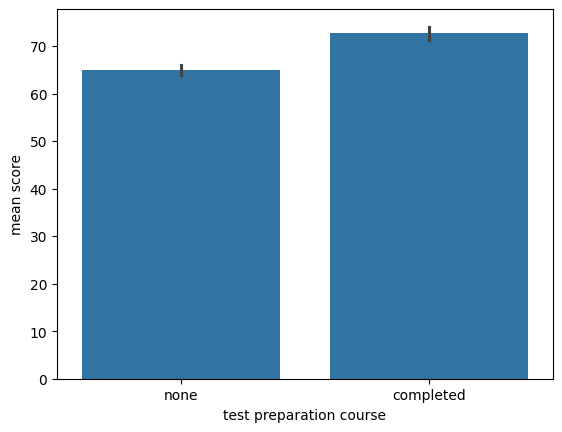

In [ ]:

sns.barplot(x = 'test preparation course', y = 'mean score', data = students)

#### Task 5: Feature encoding

Now that we have fully explored the variables in the dataset, we can move on to getting the dataset reading for modelling. More specifically, we want to turn the categorical data in our dataset into numerical data. This process is otherwise known as feature encoding.

But before we dive into feature encoding, it is important that we first contrast the difference between a nominal variable and an ordinal variable. This is so that we can match the right encoder to the right variable.

Nominal variable is a categorical variable where its data does not have a logical ordering. Some examples of nominal data are:

* Male and female
* Location A, location B and location C

Ordinal variable, on the other hand, is also a categorical variable but its data follows a logical ordering. Some example of ordinal data include:

* Small, medium and large
* Bad, neutral and good
* Children, adults and seniors
* Low, medium and high income

##### Encoding nominal variables
The nominal variables in our dataset include:

* Gender
* Race/ethnicity
* Lunch
* Test prepation course

In this part, we will be using the Pandas get_dummies.

In [ ]:
# Assuming 'students' is your DataFrame
encoded = pd.get_dummies(students, columns=['gender', 'lunch', 'race/ethnicity', 'test preparation course'], dtype=int)

encoded.head()


,parental level of education,mean score,gender_female,gender_male,lunch_free/reduced,lunch_standard,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,test preparation course_completed,test preparation course_none
0,bachelor degree,72.666667,1,0,0,1,0,1,0,0,0,0,1
1,some college,82.333333,1,0,0,1,0,0,1,0,0,1,0
2,master degree,92.666667,1,0,0,1,0,1,0,0,0,0,1
3,associate degree,49.333333,0,1,1,0,1,0,0,0,0,0,1
4,some college,76.333333,0,1,0,1,0,0,1,0,0,0,1


###### Encoding ordinal variable
The only ordinal variable in our dataset is the parental level of education feature.

In this section, we will be using Pandas map method.

In [ ]:
encoded['parental level of education'] = encoded['parental level of education'].map({'some high school': 0,
                                         'high school': 1,
                                         'some college': 2,
                                         'associate degree': 3,
                                         'bachelor degree': 4,
                                         'master degree': 5})

In [ ]:
encoded.head()

,parental level of education,mean score,gender_female,gender_male,lunch_free/reduced,lunch_standard,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,test preparation course_completed,test preparation course_none
0,4,72.666667,1,0,0,1,0,1,0,0,0,0,1
1,2,82.333333,1,0,0,1,0,0,1,0,0,1,0
2,5,92.666667,1,0,0,1,0,1,0,0,0,0,1
3,3,49.333333,0,1,1,0,1,0,0,0,0,0,1
4,2,76.333333,0,1,0,1,0,0,1,0,0,0,1


#### Task 6: Training the Gradient Boost model

Gradient Boost is one of the regresssion algorithms. You can import using the following command:

from sklearn.ensemble import GradientBoostingRegressor

Follow the same steps we did last lab to train this model

In [ ]:
# Write your answer here
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
# Write your answer for step1 here

from sklearn.model_selection import train_test_split

encoded["mean score"].unique()

x=encoded.drop("mean score", axis=1)
y= encoded["mean score"]

y.head()

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3)
print(x_train.shape)
print(x_test.shape)


(700, 12)
(300, 12)


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
GBR = GradientBoostingRegressor()
GBR.fit(x_train, y_train)

r2_score = GBR.score(x_test,y_test)# i think the accuracy
print(r2_score*100,'%')

17.02369930831865 %
